testing writing to pdf

In [ ]:
import debugpy
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import os
import gzip
import numpy as np
import cell2location

<center><h3><B>Loading VisiumHD

In [ ]:
def calcQCmat(andata):
    andata.var_names_make_unique()
    andata.var["mt"] = andata.var_names.str.startswith("mt-")
    andata.var["ribo"] = andata.var_names.str.startswith(("RPS", "RPL"))
    andata.var["hb"] = andata.var_names.str.contains("^HB[^(P)]")
    sc.pp.calculate_qc_metrics(andata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True)
    return andata
path_016 = "/data/kanferg/Sptial_Omics/playGround/Data/Visium_HD_Mouse_Brain_square_example/square_016um"
andata016_ = sc.read_visium(path=path_016)
andata016 = calcQCmat(andata016_)
andata016.raw = andata016.copy()
andata016 = andata016[:,andata016.var.n_cells_by_counts > 50]
sc.pp.normalize_total(andata016)
sc.pp.log1p(andata016)
log1p_data = andata016.X.todense()
sc.pp.highly_variable_genes(andata016)
sc.pp.scale(andata016)
andata016.obsm['spatial'] = np.array(andata016.obsm['spatial'], dtype=np.float64)
sc.pp.pca(andata016, n_comps=10)
sc.pp.neighbors(andata016)
sc.tl.leiden(andata016, key_added="clusters" ,resolution=0.7 , directed=False, n_iterations=2)

In [2]:
# Define the path to the saved .h5ad file
pathout = "/data/kanferg/Sptial_Omics/SpatialOmicsToolkit/out"
file_path = os.path.join(pathout, 'leiden0.5_rank_16um.h5ad')

# Load the .h5ad file
andata016 = sc.read(file_path)
andata016

AnnData object with n_obs × n_vars = 97163 × 13964
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_counts', 'n_genes', 'clusters'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'clusters', 'dea_clusters', 'hvg', 'log1p', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [1]:
import debugpy
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import os
import gzip
import numpy as np
import cell2location

[rank: 0] Global seed set to 0


In [2]:
# adata_ref = sc.read(
#     f'38795736-71ed-4b5d-b7a1-91a9b60d52a2.h5ad',
#     backup_url='https://datasets.cellxgene.cziscience.com/38795736-71ed-4b5d-b7a1-91a9b60d52a2.h5ad'
# )
adata_ref = sc.read('38795736-71ed-4b5d-b7a1-91a9b60d52a2.h5ad')

In [3]:
adata_ref.X = adata_ref.raw.X

In [122]:
adata_ref

AnnData object with n_obs × n_vars = 384925 × 51676
    obs: 'SRA_ID', 'Sample_ID', 'organism_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'assay_ontology_term_id', 'suspension_type', 'Dataset', 'Batch_ID', 'nCount_RNA', 'nFeature_RNA', 'percent_mt', 'C7_named', 'C25_named', 'C66_named', 'C185_named', 'C286_named', 'C465_named', 'Author_Class_Curated', 'Author_CellType', 'Region_summarized', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'features', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length'
    uns: 'batch_condition', 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_umap'

In [123]:
# remove cells and genes with 0 counts everywhere
sc.pp.filter_cells(adata_ref, min_genes=1)
sc.pp.filter_genes(adata_ref, min_cells=1)
adata_ref

AnnData object with n_obs × n_vars = 384925 × 46402
    obs: 'SRA_ID', 'Sample_ID', 'organism_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'assay_ontology_term_id', 'suspension_type', 'Dataset', 'Batch_ID', 'nCount_RNA', 'nFeature_RNA', 'percent_mt', 'C7_named', 'C25_named', 'C66_named', 'C185_named', 'C286_named', 'C465_named', 'Author_Class_Curated', 'Author_CellType', 'Region_summarized', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes'
    var: 'features', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'n_cells'
    uns: 'batch_condition', 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_umap'

In [22]:
adata_ref[:,adata_ref.var['n_cells'] < 1000].var['n_cells']

ENSMUSG00000102693     17
ENSMUSG00000064842      1
ENSMUSG00000102851    213
ENSMUSG00000103147     76
ENSMUSG00000102348    362
                     ... 
ENSMUSG00000117782      7
ENSMUSG00000117951     17
ENSMUSG00000118197    282
ENSMUSG00000064336    948
ENSMUSG00000064350    510
Name: n_cells, Length: 26743, dtype: int64

<Axes: xlabel='n_genes', ylabel='Count'>

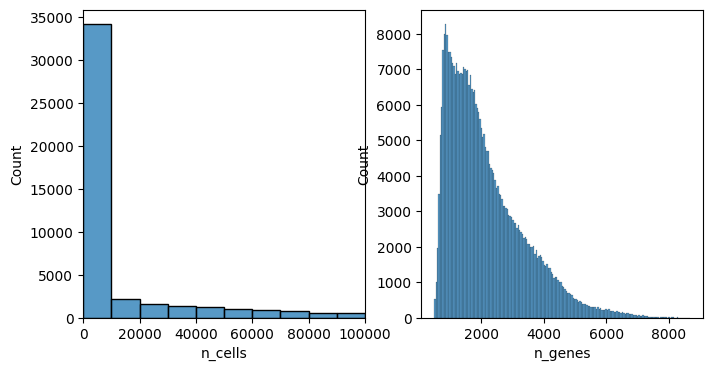

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.histplot(adata_ref[:,adata_ref.var['n_cells'] < 100000].var['n_cells'],kde=False,ax = axs[0],bins = 10)
axs[0].set_xlim(0,100000)
sns.histplot(adata_ref.obs['n_genes'],kde=False,ax = axs[1])


In [40]:
adata_ref

AnnData object with n_obs × n_vars = 384925 × 46402
    obs: 'SRA_ID', 'Sample_ID', 'organism_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'assay_ontology_term_id', 'suspension_type', 'Dataset', 'Batch_ID', 'nCount_RNA', 'nFeature_RNA', 'percent_mt', 'C7_named', 'C25_named', 'C66_named', 'C185_named', 'C286_named', 'C465_named', 'Author_Class_Curated', 'Author_CellType', 'Region_summarized', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes'
    var: 'features', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'n_cells'
    uns: 'batch_condition', 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_umap'

In [4]:
adata_ref.obs['cell_type']

AAACCCAAGGGTGAAA-1_SRR14252354            neuron
AAACCCACAGCACACC-1_SRR14252354            neuron
AAACCCATCCCGAAAT-1_SRR14252354            neuron
AAACGAAAGACCAGCA-1_SRR14252354            neuron
AAACGAAAGGTCCAGA-1_SRR14252354            neuron
                                       ...      
GTCACCCCCGAA_SRR7535555                   neuron
TTGTAGTTGAGT_SRR7535555           ependymal cell
TTTTCCACCCCT_SRR7535555                   neuron
GGTGAGGCGGTG_SRR7535555                   neuron
GATTAACGGCGG_SRR7535555                   neuron
Name: cell_type, Length: 384925, dtype: category
Categories (13, object): ['fibroblast', 'ependymal cell', 'endothelial cell', 'astrocyte', ..., 'oligodendrocyte precursor cell', 'mural cell', 'pituitary gland cell', 'hypendymal cell']

In [5]:
adata_ref.var.set_index('features', drop=True, inplace=True)
adata_ref.var

,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length
features,,,,,
ENSMUSG00000102693,False,4933401J01Rik,NCBITaxon:10090,gene,1070
ENSMUSG00000064842,False,Gm26206,NCBITaxon:10090,gene,110
ENSMUSG00000051951,False,Xkr4,NCBITaxon:10090,gene,6094
ENSMUSG00000102851,False,Gm18956,NCBITaxon:10090,gene,480
ENSMUSG00000103377,False,Gm37180,NCBITaxon:10090,gene,2819
...,...,...,...,...,...
ENSMUSG00000064368,False,mt-Nd6,NCBITaxon:10090,gene,519
ENSMUSG00000064369,False,mt-Te,NCBITaxon:10090,gene,69
ENSMUSG00000064370,False,mt-Cytb,NCBITaxon:10090,gene,1144


In [6]:
del adata_ref.raw

In [7]:
adata_ref.raw

In [8]:
adata_ref

AnnData object with n_obs × n_vars = 384925 × 51676
    obs: 'SRA_ID', 'Sample_ID', 'organism_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'assay_ontology_term_id', 'suspension_type', 'Dataset', 'Batch_ID', 'nCount_RNA', 'nFeature_RNA', 'percent_mt', 'C7_named', 'C25_named', 'C66_named', 'C185_named', 'C286_named', 'C465_named', 'Author_Class_Curated', 'Author_CellType', 'Region_summarized', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length'
    uns: 'batch_condition', 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_umap'

In [69]:
# remove cells and genes with 0 counts everywhere
sc.pp.filter_cells(adata_ref, min_genes=1)
sc.pp.filter_genes(adata_ref, min_cells=1)

In [87]:
test = (adata_ref.X.toarray() > 0).sum(0)

In [89]:
ind = np.argsort(test)
test[ind]

array([     1,      1,      1, ..., 337408, 346575, 379946])

In [91]:
np.histogram(test)

(array([38972,  3743,  1810,   901,   474,   268,   155,    55,    22,
            2]),
 array([1.000000e+00, 3.799550e+04, 7.599000e+04, 1.139845e+05,
        1.519790e+05, 1.899735e+05, 2.279680e+05, 2.659625e+05,
        3.039570e+05, 3.419515e+05, 3.799460e+05]))

Mean of left tail: 2.032758620689655
Median of left tail: 2.0
Standard deviation of left tail: 1.0503509973328427


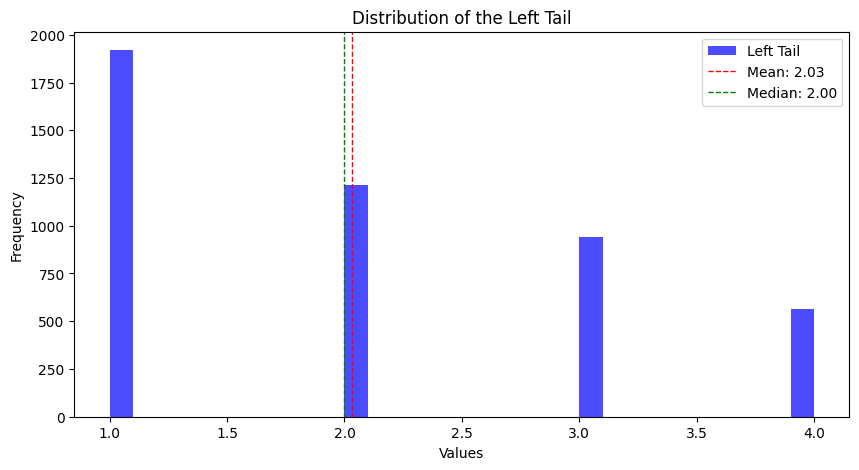

In [97]:
import numpy as np
import matplotlib.pyplot as plt


# Step 1: Sort the data
sorted_data = np.sort(test)

# Step 2: Select the left tail, e.g., the lowest 5%
tail_percentage = 0.10
cutoff_index = int(len(sorted_data) * tail_percentage)
left_tail = sorted_data[:cutoff_index]

# Step 3: Calculate summary statistics
mean_tail = np.mean(left_tail)
median_tail = np.median(left_tail)
std_tail = np.std(left_tail)

print("Mean of left tail:", mean_tail)
print("Median of left tail:", median_tail)
print("Standard deviation of left tail:", std_tail)

# Step 4: Plot the data
plt.figure(figsize=(10, 5))
plt.hist(left_tail, bins=30, alpha=0.7, color='blue', label='Left Tail')
plt.axvline(mean_tail, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_tail:.2f}')
plt.axvline(median_tail, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median_tail:.2f}')
plt.title('Distribution of the Left Tail')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


(0.0, 10.0)

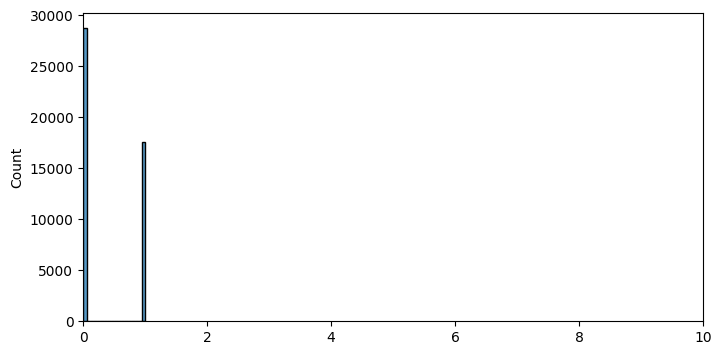

In [85]:
fig, axs = plt.subplots(1, 1, figsize=(8, 4))
#sns.histplot(adata_ref[:,adata_ref.var['n_cells'] < 100000].var['n_cells'],kde=False,ax = axs[0],bins = 10)
#axs[0].set_xlim(0,100000)
sns.histplot(test<100,kde=False,ax = axs)
axs.set_xlim(0,10)

In [98]:
includeZero = adata_ref.X.toarray().sum(0)

In [119]:
adata_ref.raw.X[:100,:100].todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [110]:
sns.histplot(np.ravel(adata_ref.X[:100,:100]),kde=False,ax = axs)

<__array_function__ internals>:180: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.


TypeError: 'NoneType' object is not iterable

In [124]:
adata_ref.X[:100,:100].toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 2.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [125]:
adata_ref.X[:10,:10].toarray().sum(0)

array([0., 0., 0., 0., 0., 1., 1., 0., 0., 0.], dtype=float32)

Mean of left tail: 1.4033415
Median of left tail: 1.4357274
Standard deviation of left tail: 0.53064716


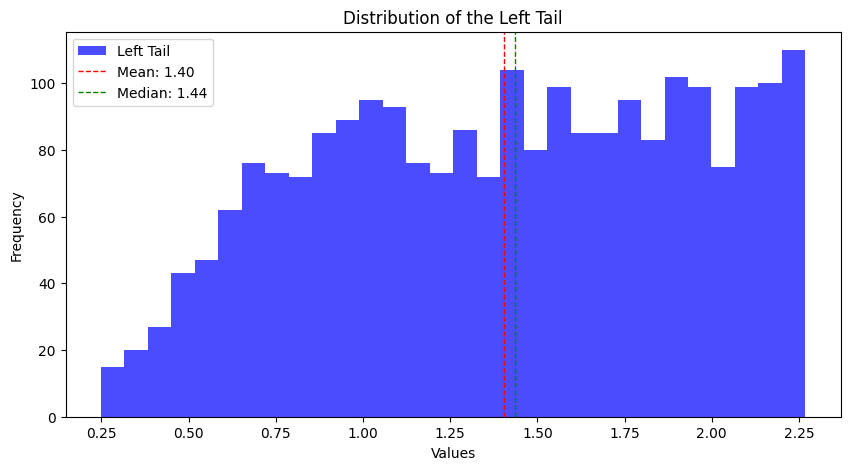

In [100]:
import numpy as np
import matplotlib.pyplot as plt


# Step 1: Sort the data
sorted_data = np.sort(includeZero)

# Step 2: Select the left tail, e.g., the lowest 5%
tail_percentage = 0.05
cutoff_index = int(len(sorted_data) * tail_percentage)
left_tail = sorted_data[:cutoff_index]

# Step 3: Calculate summary statistics
mean_tail = np.mean(left_tail)
median_tail = np.median(left_tail)
std_tail = np.std(left_tail)

print("Mean of left tail:", mean_tail)
print("Median of left tail:", median_tail)
print("Standard deviation of left tail:", std_tail)

# Step 4: Plot the data
plt.figure(figsize=(10, 5))
plt.hist(left_tail, bins=30, alpha=0.7, color='blue', label='Left Tail')
plt.axvline(mean_tail, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_tail:.2f}')
plt.axvline(median_tail, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median_tail:.2f}')
plt.title('Distribution of the Left Tail')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
# calculate the mean of each gene across non-zero cells
adata_ref.var['n_cells'] = (adata_ref.X.toarray() > 0).sum(0)
adata_ref.var['nonz_mean'] = adata_ref.X.toarray().sum(0) / adata_ref.var['n_cells']
adata_ref

In [51]:
np.min(adata_ref.var['nonz_mean']),np.max(adata_ref.var['nonz_mean'])

(0.24836549162864685, 5.798446358166687)

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(8, 4))
#sns.histplot(adata_ref[:,adata_ref.var['n_cells'] < 100000].var['n_cells'],kde=False,ax = axs[0],bins = 10)
#axs[0].set_xlim(0,100000)
sns.histplot(adata_ref.var['nonz_mean'],kde=False,ax = axs)


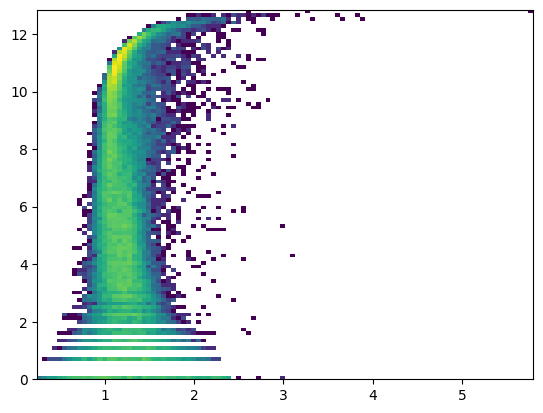

In [46]:
from matplotlib.colors import LogNorm
plt.hist2d(adata_ref.var['nonz_mean'],
           np.log(adata_ref.var['n_cells']),
           norm=LogNorm(),bins =100,
#            range=[[-1,5], [-1,10]]
          );

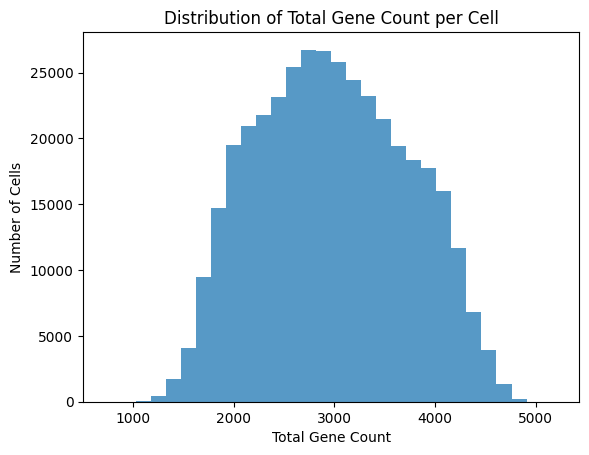

In [6]:
adata_ref.obs['total_genes'] = adata_ref.X.sum(axis=1)

# Plotting the histogram of total gene counts per cell
plt.hist(adata_ref.obs['total_genes'], bins=30, alpha=0.75)
plt.title('Distribution of Total Gene Count per Cell')
plt.xlabel('Total Gene Count')
plt.ylabel('Number of Cells')
plt.show()

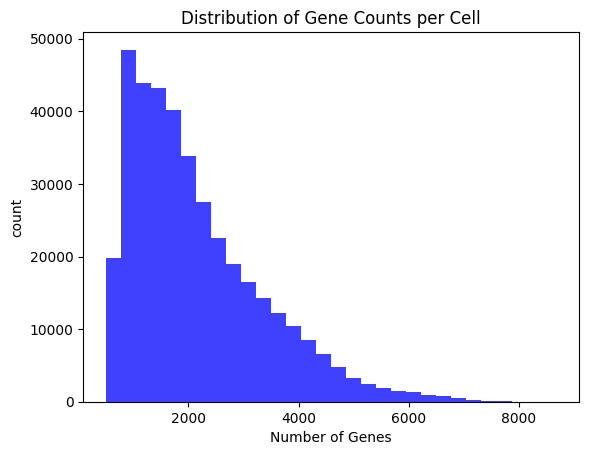

In [8]:
# Calculate the number of genes expressed per cell (non-zero entries)
adata_ref.obs['n_genes'] = (adata_ref.X > 0).sum(axis=1)

# Plotting the histogram of the number of genes per cell
plt.hist(adata_ref.obs['n_genes'], bins=30, alpha=0.75, color='blue')
plt.title('Distribution of Gene Counts per Cell')
plt.xlabel('Number of Genes')
plt.ylabel('count')
plt.show()

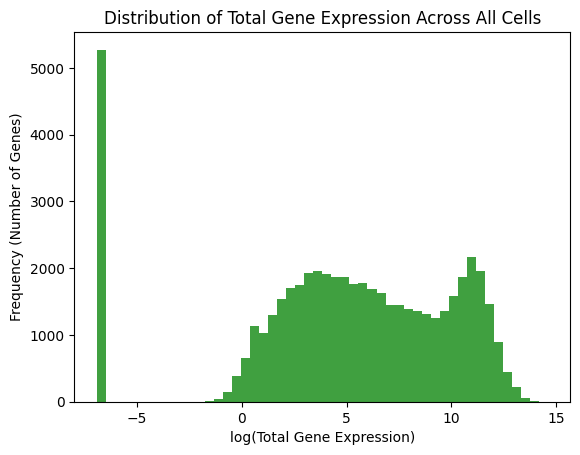

In [20]:
import scipy
gene_totals = adata_ref.X.sum(axis=0)

# Assuming 'adata' is your AnnData object loaded with single-cell data
# Calculate the sum of expressions for each gene across all cells


# Check if the result is a sparse matrix and convert to dense array if true
if isinstance(gene_totals, scipy.sparse.spmatrix):
    gene_totals = gene_totals.toarray()

# Flatten the array to make it suitable for histogram plotting
gene_totals = np.ravel(gene_totals)
gene_totals = gene_totals+0.001

# Plotting the histogram of the gene totals
plt.hist(np.log(gene_totals), bins=50, alpha=0.75, color='green')
plt.title('Distribution of Total Gene Expression Across All Cells')
plt.xlabel('log(Total Gene Expression)')
plt.ylabel('Frequency (Number of Genes)')
plt.show()

In [5]:
10^1

0.004321373782642578

/usr/local/apps/cell2location/conda/envs/0.1.3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


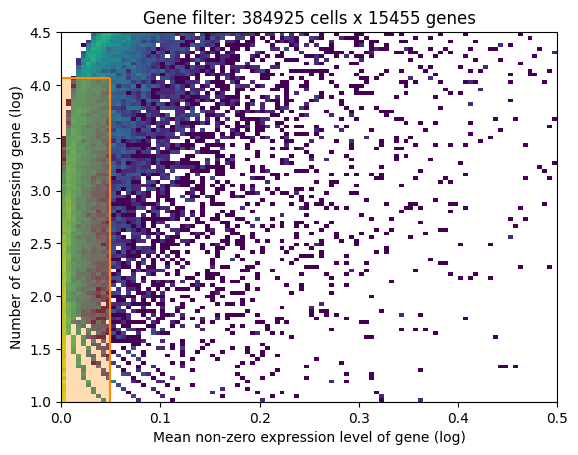

In [4]:
from cell2location.utils.filtering import filter_genes
selected = filter_genes(adata_ref, cell_count_cutoff=5, cell_percentage_cutoff2=0.03, nonz_mean_cutoff=1.12)

# filter the object
adata_ref = adata_ref[:, selected].copy()

In [5]:
# prepare anndata for the regression model
cell2location.models.RegressionModel.setup_anndata(adata=adata_ref,
                        # 10X reaction / sample / batch
                        batch_key='Batch_ID',
                        # cell type, covariate used for constructing signatures
                        labels_key='cell_type',
                        # multiplicative technical effects (platform, 3' vs 5', donor effect)
                        categorical_covariate_keys=['assay']
                       )

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [6]:
# create the regression model
from cell2location.models import RegressionModel
mod = RegressionModel(adata_ref)

# view anndata_setup as a sanity check
mod.view_anndata_setup()

Anndata setup with scvi-tools version 0.20.3.

Setup via `RegressionModel.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': 'Batch_ID',
│   'labels_key': 'cell_type',
│   'categorical_covariate_keys': ['assay'],
│   'continuous_covariate_keys': None
}

         Summary Statistics          
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃     Summary Stat Key     ┃ Value  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│         n_batch          │   29   │
│         n_cells          │ 384925 │
│ n_extra_categorical_covs │   1    │
│ n_extra_continuous_covs  │   0    │
│         n_labels         │   13   │
│          n_vars          │ 15455  │
└──────────────────────────┴────────┘

                             Data Registry                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Registry Key      ┃            scvi-tools Location             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           X            │                  adata.X                   │
│         batch          │          adata.obs['_scvi_batch']          │
│ extra_categorical_covs │ adata.obsm['_scvi_extra_categorical_covs'] │
│         ind_x          │           adata.obs['_indices']            │
│         labels         │         adata.obs['_scvi_labels']          │
└────────────────────────┴────────────────────────────────────────────┘

                           batch State Registry                           
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location    ┃        Categories        ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['Batch_ID'] │   Affinati10x_batch_1    │          0          │
│                       │   Affinati10x_batch_2    │          1          │
│                       │   Affinati10x_batch_3    │          2          │
│                       │   Affinati10x_batch_4    │          3          │
│                       │   Anderson10x_batch_1    │          4          │
│                       │ CampbellDropseq_batch_1  │          5          │
│                       │ CampbellDropseq_batch_2  │          6          │
│                       │   ChenDropseq_batch_1    │          7          │
│                       │  Dowsett10xnuc_batch_1   │          8          │
│                       │  Dowsett10xnuc_batch_2   │          9          │
│                       │     Flynn10x_batch_1     │         10          │
│                       │     Flynn10x_batch_2     │         11          │
│                       │      Kim10x_batch_1      │         12          │
│                       │    LeeDropseq_batch_1    │         13          │
│                       │   Mickelsen10x_batch_1   │         14          │
│                       │    Moffit10x_batch_1     │         15          │
│                       │    Moffit10x_batch_2     │         16          │
│                       │    Moffit10x_batch_3     │         17          │
│                       │    Morris10x_batch_1     │         18          │
│                       │    Morris10x_batch_2     │         19          │
│                       │    Morris10x_batch_3     │         20          │
│                       │ Mousebrainorg10x_batch_1 │         21          │
│                       │ Mousebrainorg10x_batch_2 │         22          │
│                       │  RomanovDev10x_batch_1   │         23          │
│                       │   RossiDropseq_batch_1   │         24          │
│                       │     Rupp10x_batch_1      │         25          │
│                       │    kimDev10x_batch_1     │         26          │
│                       │      wen10x_batch_1      │         27          │
│                       │    wenDropseq_batch_1    │         28          │
└───────────────────────┴──────────────────────────┴─────────────────────┘

                              labels State Registry                              
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃           Categories           ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['cell_type'] │           fibroblast           │          0          │
│                        │         ependymal cell         │          1          │
│                        │        endothelial cell        │          2          │
│                        │           astrocyte            │          3          │
│                        │        oligodendrocyte         │          4          │
│                        │        microglial cell         │          5          │
│                        │          erythrocyte           │          6          │
│                        │             neuron             │          7          │
│                        │            tanycyte            │          8          │
│                        │ oligodendrocyte precursor cell │          9          │
│                        │           mural cell           │         10          │
│                        │      pituitary gland cell      │         11          │
│                        │        hypendymal cell         │         12          │
└────────────────────────┴────────────────────────────────┴─────────────────────┘

          extra_categorical_covs State Registry          
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃  Source Location   ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['assay'] │  Drop-seq  │          0          │
│                    │ 10x 3' v2  │          1          │
│                    │ 10x 3' v1  │          2          │
│                    │ 10x 3' v3  │          3          │
│                    │            │                     │
└────────────────────┴────────────┴─────────────────────┘

In [7]:
mod.train(max_epochs=50, use_gpu=True)

/usr/local/apps/cell2location/conda/envs/0.1.3/lib/python3.9/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/local/apps/cell2location/conda/envs/0.1.3/lib/p ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/apps/cell2location/conda/envs/0.1.3/lib/python3.9/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/local/apps/cell2location/conda/envs/0.1.3/lib/p ...
  rank_zero_warn(
/usr/local/apps/cell2location/conda/envs/0.1

Epoch 50/50: 100%|█████████████████████████████████████████| 50/50 [37:31<00:00, 44.94s/it, v_num=1, elbo_train=2.46e+9]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|█████████████████████████████████████████| 50/50 [37:31<00:00, 45.03s/it, v_num=1, elbo_train=2.46e+9]


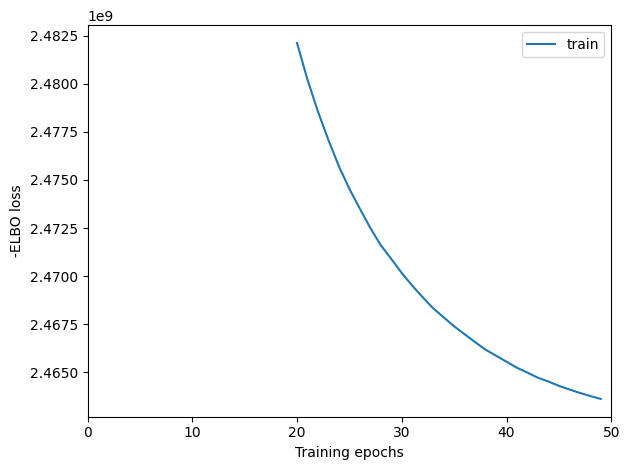

In [8]:
mod.plot_history(20)

In [15]:
adata_ref


AnnData object with n_obs × n_vars = 384925 × 15455
    obs: 'SRA_ID', 'Sample_ID', 'organism_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'assay_ontology_term_id', 'suspension_type', 'Dataset', 'Batch_ID', 'nCount_RNA', 'nFeature_RNA', 'percent_mt', 'C7_named', 'C25_named', 'C66_named', 'C185_named', 'C286_named', 'C465_named', 'Author_Class_Curated', 'Author_CellType', 'Region_summarized', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', '_indices', '_scvi_batch', '_scvi_labels'
    var: 'features', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'n_cells', 'nonz_mean'
    uns: 'batch_condition', 'citation', 'schema_reference', 'schema_version', '

In [1]:
adata_ref = mod.export_posterior(
    adata_ref, use_quantiles=True,
    # choose quantiles
    sample_kwargs={'batch_size': 1000, 'use_gpu': True}
)

NameError: name 'mod' is not defined

In [12]:
mod.plot_QC()

KeyError: 'post_sample_means'